# ID3 Decision Tree Algorithm Using Entropy and Gini Models

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
# Loading Tennis Data from Github
tennisData = pd.read_csv("https://raw.githubusercontent.com/ShriHemaPriya/MBA6693/main/tennis.csv")

In [3]:
# Viewing the data
tennisData.head(14)

,outlook,temperature,humidity,wind,playtennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [4]:
# Displaying No. of columns and rows in the dataset
tennisData.shape

(14, 5)

In [5]:
# Viewing information of the dataset
tennisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   wind         14 non-null     object
 4   playtennis   14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [6]:
#Statistics of the dataset
tennisData.describe(include = 'all')

,outlook,temperature,humidity,wind,playtennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,normal,weak,yes
freq,5,6,7,8,9


In [7]:
#splitting dataset as X and Y
features=["outlook", "temperature", "humidity", "wind"]
X = tennisData[features]
Y = tennisData.playtennis

In [8]:
#Viewing train and test dataset
print("Training Dataset: \n", X)
print("Testing Dataset: \n", Y)

Training Dataset: 
      outlook temperature humidity    wind
0      sunny         hot     high    weak
1      sunny         hot     high  strong
2   overcast         hot     high    weak
3       rain        mild     high    weak
4       rain        cool   normal    weak
5       rain        cool   normal  strong
6   overcast        cool   normal  strong
7      sunny        mild     high    weak
8      sunny        cool   normal    weak
9       rain        mild   normal    weak
10     sunny        mild   normal  strong
11  overcast        mild     high  strong
12  overcast         hot   normal    weak
13      rain        mild     high  strong
Testing Dataset: 
 0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: playtennis, dtype: object


In [9]:
# Splitting Dataset into train and test dataset with test size as 0.25 and random state as 246
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size = 0.25, random_state = 246)

In [10]:
# Call get_dummies() on our Pandas object pd, and pass X_train and X_test to it.
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [11]:
# Using Entropy Model for ID3 Algorithm with Maximum Depth 3
entropy_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3)
entropy_model.fit(X_train, Y_train)
Y_prediction = entropy_model.predict(X_test)
Y_prediction = pd.Series(Y_prediction)
entropy_model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

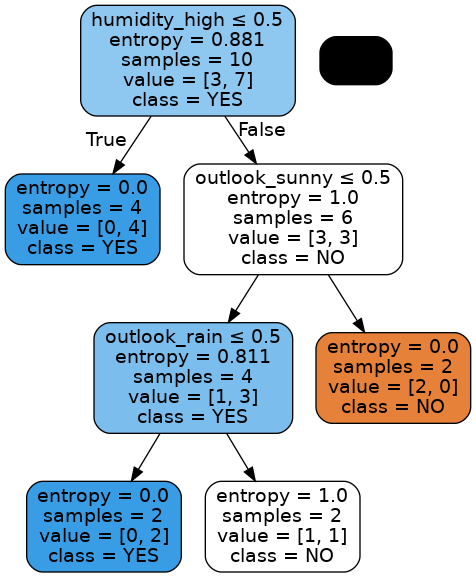

In [12]:
# Visualizing the entropy decision tree
dot_data = StringIO()
tree.export_graphviz(entropy_model, out_file=dot_data,filled=True, rounded=True, special_characters=True, 
feature_names=X_train.columns,class_names = ["NO", "YES"])

# Creating a chart
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
# Printing Accuracy of Entropy Model
print("ID3 Entropy Model Max Depth 3")
print("Accuracy:", metrics.accuracy_score(Y_test,Y_prediction))
print("Balanced accuracy:", metrics.balanced_accuracy_score(Y_test,Y_prediction))
print('Precision score for "Yes"' , metrics.precision_score(Y_test,Y_prediction, pos_label = "yes"))
print('Recall score for "No"' , metrics.recall_score(Y_test,Y_prediction, pos_label = "no"))

ID3 Entropy Model Max Depth 3
Accuracy: 0.75
Balanced accuracy: 0.75
Precision score for "Yes" 0.6666666666666666
Recall score for "No" 0.5


In [14]:
# Using Gini Model for ID3 Algorithm with Maximum Depth 3
gini_model = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3) 
gini_model.fit(X_train, Y_train)
Y_pred = gini_model.predict(X_test)
Y_pred = pd.Series(Y_pred)
gini_model

DecisionTreeClassifier(max_depth=3)

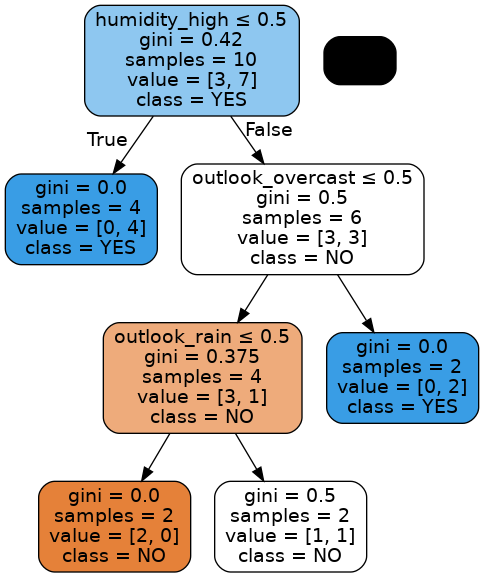

In [15]:
# Visualizing the gini decision tree
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,filled=True, rounded=True, special_characters=True, 
feature_names=X_train.columns,class_names = ["NO", "YES"])

# Creating a chart
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
# Printing the Accuracy of Gini Model
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(Y_test,Y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(Y_test,Y_pred))
print('Precision score' , metrics.precision_score(Y_test,Y_pred, pos_label = "yes"))
print('Recall score' , metrics.recall_score(Y_test,Y_pred, pos_label = "no"))

Gini impurity  model - max depth 3
Accuracy: 0.75
Balanced accuracy: 0.75
Precision score 0.6666666666666666
Recall score 0.5


### By comparing the accuracies of the Entropy and the Gini Model for ID3 Algorithm (max depth = 3), both the models provide the same 75% accuracy for "tennis" dataset.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2dbe32be-e994-4f53-a670-d1aa34020dfb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>